<a href="https://colab.research.google.com/github/Sujanasri24/Music-Genre-Classification/blob/main/music_genre_classfication_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ****Importing Libraries****

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.preprocessing import RobustScaler

# **EDA - Exploratory Data Analysis**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/mini project /Data/features_3_sec.csv')
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [4]:
df.shape

(9990, 60)

In [5]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [7]:
df.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

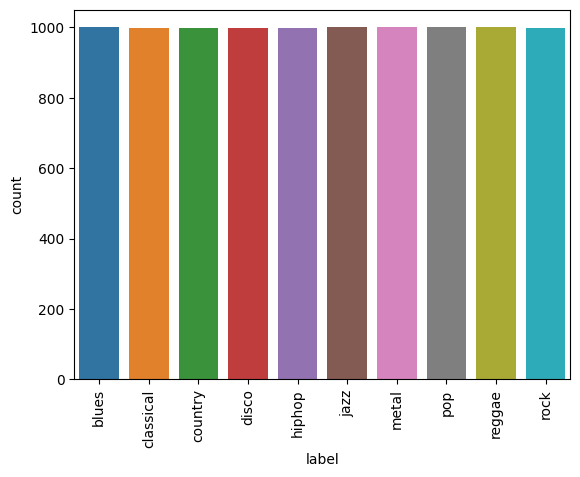

In [8]:
sns.countplot(x=df.label) # plot the categories
plt.xticks(rotation=90);

# **Data preprocessing**

# **Dropping the unwanted labels**

In [9]:
df=df.drop(labels='filename',axis=1)
df.head()

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0   66149          0.335406         0.091048  0.130405  0.003521   
1   66149          0.343065         0.086147  0.112699  0.001450   
2   66149          0.346815         0.092243  0.132003  0.004620   
3   66149          0.363639         0.086856  0.132565  0.002448   
4   66149          0.335579         0.088129  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   
2             1788.539719          111407.437613              2084.565132   
3             1655.289045          111952.284517              1960.039988   
4             1630.656199           79667.267654              1948.503884   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0           117335.771563   3714.560359  ...   39.687145    -3.241280   
1            65671.875673   3869.682242  ...   64.748276    -6.055294   
2            75124.921716   3997.639160  ...   67.336563    -1.768610   
3            82913.639269   3568.300218  ...   47.739452    -3.841155   
4            60204.020268   3469.992864  ...   30.336359     0.664582   

   mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0   36.488243     0.722209   38.099152    -5.050335   33.618073    -0.243027   
1   40.677654     0.159015   51.264091    -2.837699   97.030830     5.784063   
2   28.348579     2.378768   45.717648    -1.938424   53.050835     2.517375   
3   28.337118     1.218588   34.770935    -3.580352   50.836224     3.630866   
4   45.880913     1.689446   51.363583    -3.392489   26.738789     0.536961   

   mfcc20_var  label  
0   43.771767  blues  
1   59.943081  blues  
2   33.105122  blues  
3   32.023678  blues  
4   29.146694  blues  

[5 rows x 59 columns]

#**Scaling the features and Encoding the labels**

In [10]:
scaler = RobustScaler()
encoder = LabelEncoder()

In [11]:
data = df.iloc[:, :-1] # get the other columns
data

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              1972.744388   
1                1816.693777           90525.690866              2010.051501   
2                1788.539719          111407.437613              2084.565132   
3                1655.289045          111952.284517              1960.039988   
4                1630.656199           79667.267654              1948.503884   
...                      ...                    ...                      ...   
9985             1499.083005          164266.886443              1718.707215   
9986             1847.965128          281054.935973              1906.468492   
9987             1346.157659          662956.246325              1561.859087   
9988             2084.515327          203891.039161              2018.366254   
9989             1634.330126          411429.169769              1867.422378   

      spectral_bandwidth_var  rolloff_mean  ...  mfcc16_mean  mfcc16_var  \
0              117335.771563   3714.560359  ...    -2.853603   39.687145   
1               65671.875673   3869.682242  ...     4.074709   64.748276   
2               75124.921716   3997.639160  ...     4.806280   67.336563   
3               82913.639269   3568.300218  ...    -1.359111   47.739452   
4               60204.020268   3469.992864  ...     2.092937   30.336359   
...                      ...           ...  ...          ...         ...   
9985            85931.574523   3015.559458  ...     5.773784   42.485981   
9986            99727.037054   3746.694524  ...     2.074155   32.415203   
9987           138762.841945   2442.362154  ...    -1.005473   78.228149   
9988            22860.992562   4313.266226  ...     4.123402   28.323744   
9989           119722.211518   3462.042142  ...     1.342274   38.801735   

      mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0       -3.241280   36.488243     0.722209   38.099152    -5.050335   
1       -6.055294   40.677654     0.159015   51.264091    -2.837699   
2       -1.768610   28.348579     2.378768   45.717648    -1.938424   
3       -3.841155   28.337118     1.218588   34.770935    -3.580352   
4        0.664582   45.880913     1.689446   51.363583    -3.392489   
...           ...         ...          ...         ...          ...   
9985    -9.094270   38.326839    -4.246976   31.049839    -5.625813   
9986   -12.375726   66.418587    -3.081278   54.414265   -11.960546   
9987    -2.524483   21.778994     4.809936   25.980829     1.775686   
9988    -5.363541   17.209942     6.462601   21.442928     2.354765   
9989   -11.598399   58.983097    -0.178517   55.761299    -6.903252   

      mfcc19_var  mfcc20_mean  mfcc20_var  
0      33.618073    -0.243027   43.771767  
1      97.030830     5.784063   59.943081  
2      53.050835     2.517375   33.105122  
3      50.836224     3.630866   32.023678  
4      26.738789     0.536961   29.146694  
...          ...          ...         ...  
9985   48.804092     1.818823   38.966969  
9986   63.452255     0.428857   18.697033  
9987   48.582378    -0.299545 

In [12]:
labels = df.iloc[:, -1] # get labels column
labels.to_frame()

label
0     blues
1     blues
2     blues
3     blues
4     blues
...     ...
9985   rock
9986   rock
9987   rock
9988   rock
9989   rock

[9990 rows x 1 columns]

In [13]:
# assign x and y, scale x and encode y
X = np.array(data, dtype = float)
X = scaler.fit_transform(data)
y = encoder.fit_transform(labels)
X.shape, y.shape

((9990, 58), (9990,))

In [14]:
mapping = {l: i for i, l in enumerate(encoder.classes_)}
mapping

{'blues': 0,
 'classical': 1,
 'country': 2,
 'disco': 3,
 'hiphop': 4,
 'jazz': 5,
 'metal': 6,
 'pop': 7,
 'reggae': 8,
 'rock': 9}

In [15]:

genres = list(mapping.keys())
values = list(mapping.values())
print(genres)
print(values)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# **Understanding the Audio Files**

In [16]:
audio_recording="/content/drive/MyDrive/mini project /Data/genres_original/country/country.00024.wav"
data , sampling_rate=librosa.load(audio_recording)
print(type(data),type(sampling_rate))
print(data)
print(sampling_rate)

<class 'numpy.ndarray'> <class 'int'>
[-0.02520752 -0.04940796 -0.09365845 ... -0.00665283 -0.00283813
  0.00167847]
22050


In [17]:
from IPython.display import Audio

In [18]:
audio_wdt = Audio(data=data,rate=sampling_rate)
display(audio_wdt)

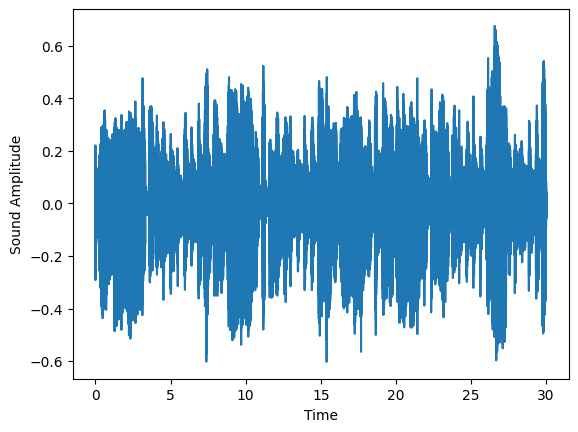

In [19]:
time = np.arange(0, len(data))/sampling_rate
plt.plot(time,data)
plt.xlabel("Time")
plt.ylabel("Sound Amplitude")
plt.show()

# **Spectrogram visualization**

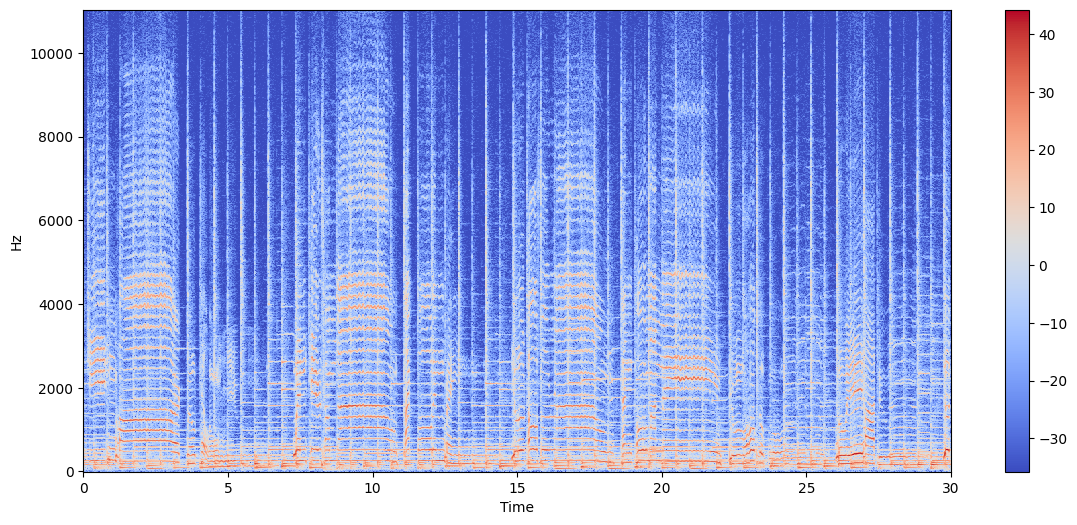

In [20]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db,sr=sampling_rate,x_axis='time',y_axis='hz')
plt.colorbar()

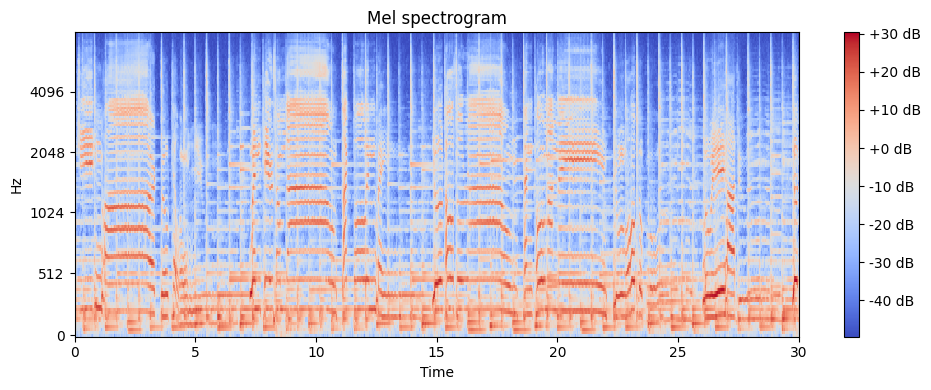

In [21]:
s=librosa.feature.melspectrogram(y=data, sr=sampling_rate)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(s), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

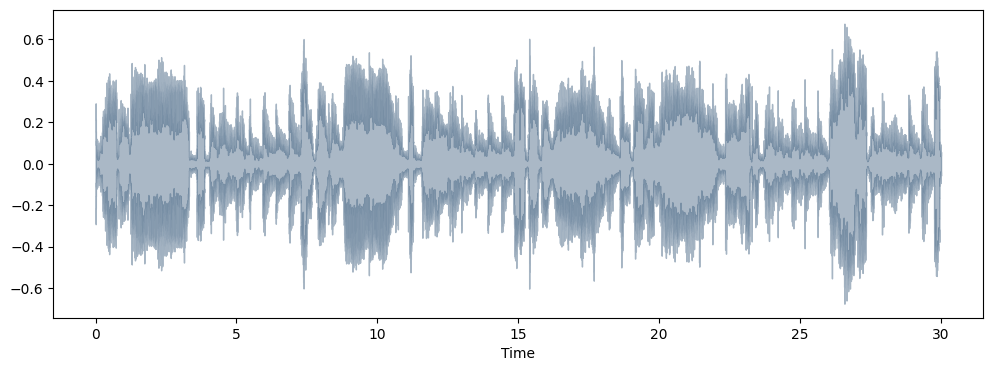

In [22]:

spectral_rolloff = librosa.feature.spectral_rolloff(y=data+0.01,sr=sampling_rate)[0]
plt.figure(figsize=(12,4))
librosa.display.waveshow(data,sr=sampling_rate,alpha=0.4, color="#2B4F72")

Text(0.5, 1.0, 'mfcc')

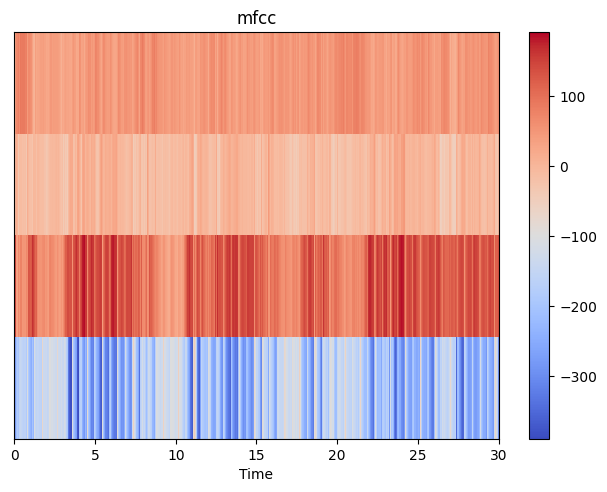

In [23]:
mfccs = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=4)
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.tight_layout()
plt.title('mfcc')


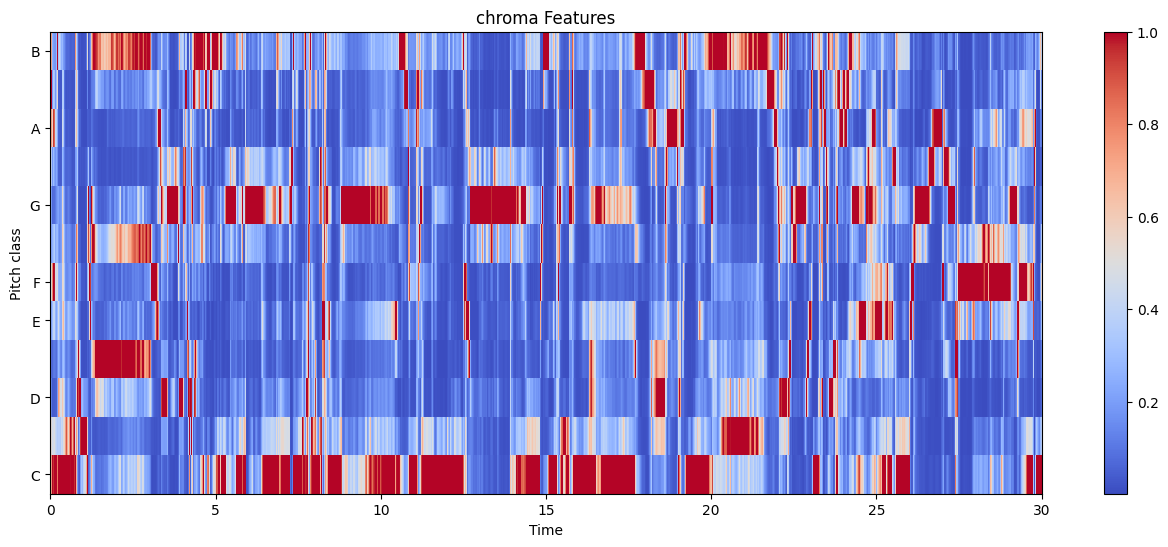

In [24]:
import librosa.display as lplt
chroma=librosa.feature.chroma_stft(y=data,sr=sampling_rate)
plt.figure(figsize=(16,6))
lplt.specshow(chroma,sr=sampling_rate,x_axis='time',y_axis='chroma',cmap='coolwarm')
plt.colorbar()
plt.title("chroma Features")
plt.show()

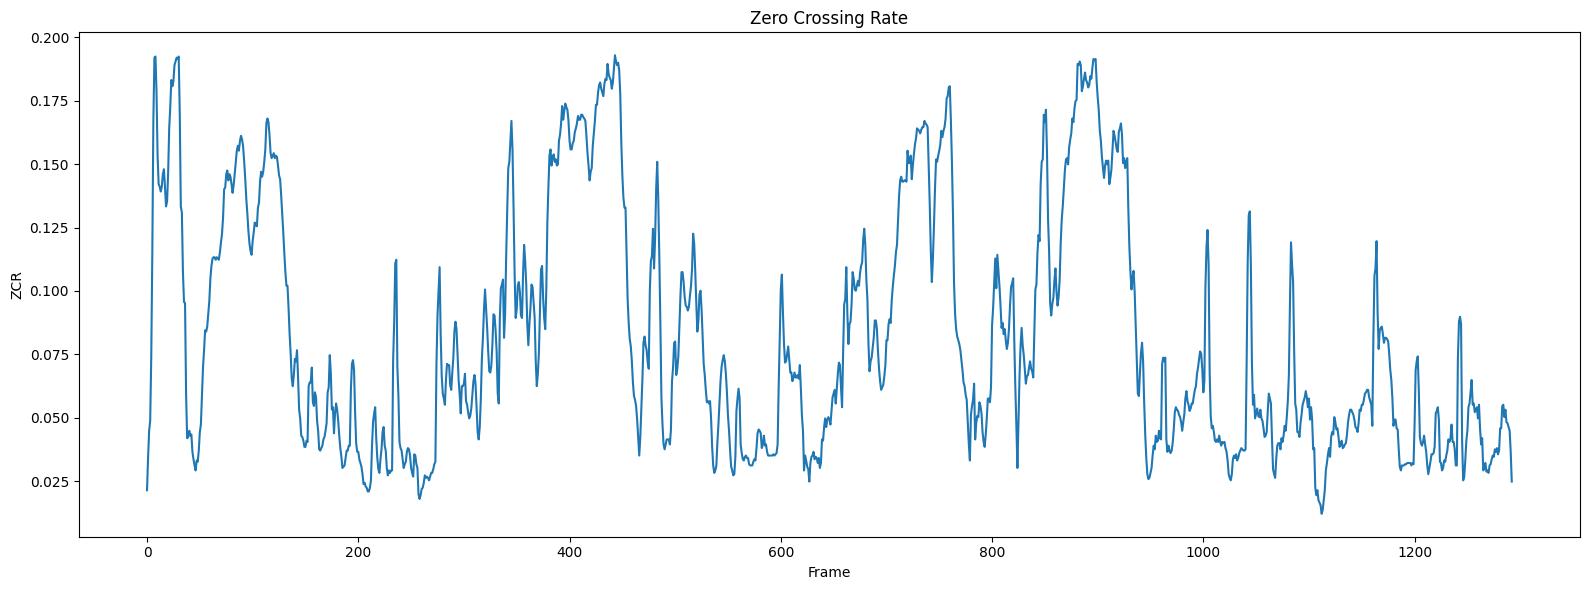

In [25]:
zcr = librosa.feature.zero_crossing_rate(data, frame_length=2048, hop_length=512)
plt.figure(figsize=(16, 6))
plt.plot(zcr[0])
plt.xlabel('Frame')
plt.ylabel('ZCR')
plt.title('Zero Crossing Rate')
plt.tight_layout()
plt.show()

In [26]:
num_zero_crossings = 0
for i in range(len(data)-1):
    if data[i] >= 0 and data[i+1] < 0:
        num_zero_crossings += 1
    elif data[i] < 0 and data[i+1] >= 0:
        num_zero_crossings += 1
num_zero_crossings

54605

# **Dividing Data Into Training and Testing Sets**

In [27]:
X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6693, 58), (3297, 58), (6693,), (3297,))

# **Building the Model**

In [28]:
from keras.models import Sequential

In [29]:
def trainModel(model,epochs,optimizer):
    batch_size =128
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics='accuracy'
    )
    return model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)

In [30]:
def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [31]:
import keras as k

In [ ]:
model=k.models.Sequential([
    k.layers.Dense(512,activation='relu',input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    k.layers.Dense(256,activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(128,activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(64,activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(10,activation='softmax'),   
])
print(model.summary())
model_history=trainModel(model=model,epochs=600,optimizer='adam')

Validation Accuracy 0.9323627352714539


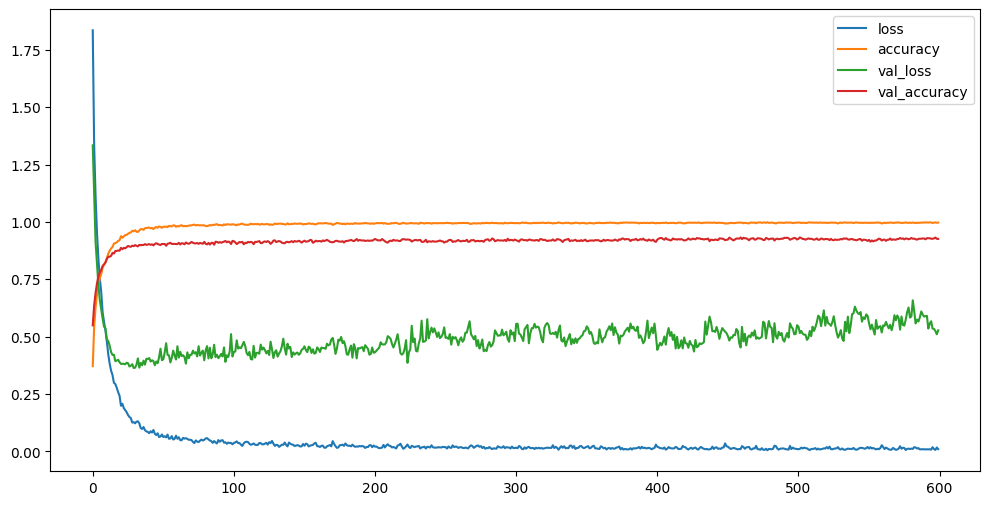

In [33]:
plotValidate(model_history)

# **Model Evaluation**

In [34]:
test_loss, test_acc = model.evaluate(X_test,y_test,batch_size=128)
print("The test Loss is:",test_loss)
print("\nThe Best test Accuracy is:",test_acc*100)

26/26 [==============================] - 0s 3ms/step - loss: 0.5272 - accuracy: 0.9260
The test Loss is: 0.5272302031517029

The Best test Accuracy is: 92.59933233261108


In [35]:
def predict(model, X, y):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(genres[y], genres[predicted_index[0]]))

In [36]:
    X_to_predict = X_test[20]
    y_to_predict = y_test[20]

    # predict sample
    predict(model, X_to_predict, y_to_predict)

1/1 [==============================] - 0s 102ms/step
Target: disco, Predicted label: disco


In [37]:
from sklearn.metrics import f1_score , accuracy_score
pred = model.predict(X_test)
preds = []
for i in pred:
    out = np.argmax(i)
    preds.append(out)
f1score = f1_score(y_test,preds,average='micro')
accuracy = accuracy_score(y_test,preds)
print('F1 score: %f' % f1score)
print('Accuracy: %f' % accuracy)

104/104 [==============================] - 0s 2ms/step
F1 score: 0.925993
Accuracy: 0.925993


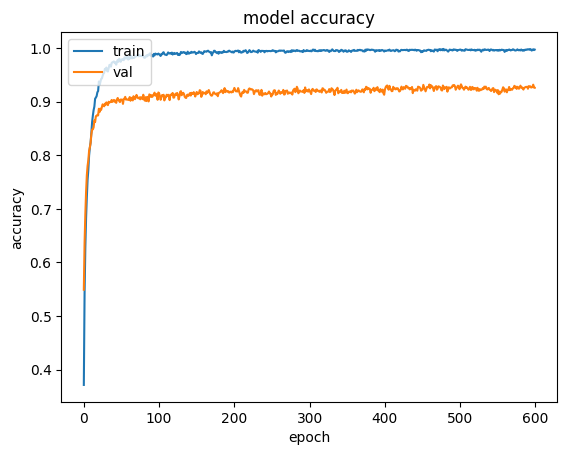

In [38]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

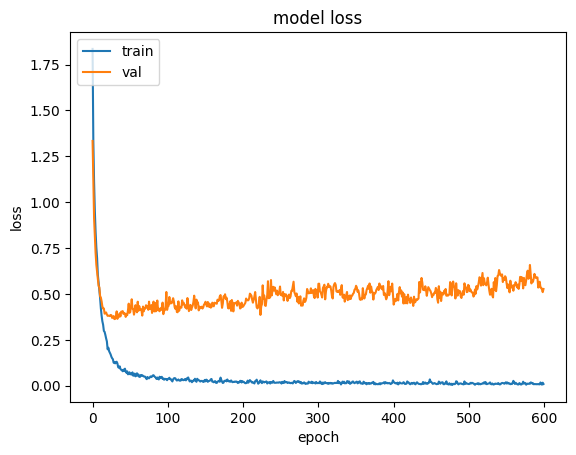

In [39]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [40]:
from sklearn.metrics import precision_score,recall_score
precision = precision_score(y_test,preds,average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,preds,average='micro')
print('Recall: %f' % recall)

Precision: 0.925993
Recall: 0.925993


In [41]:
classes = encoder.classes_

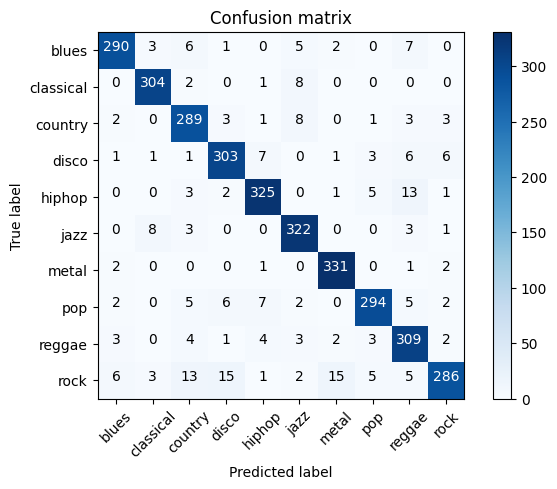

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,preds)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds, target_names=classes))
            

              precision    recall  f1-score   support

       blues       0.95      0.92      0.94       314
   classical       0.95      0.97      0.96       315
     country       0.89      0.93      0.91       310
       disco       0.92      0.92      0.92       329
      hiphop       0.94      0.93      0.93       350
        jazz       0.92      0.96      0.94       337
       metal       0.94      0.98      0.96       337
         pop       0.95      0.91      0.93       323
      reggae       0.88      0.93      0.90       331
        rock       0.94      0.81      0.87       351

    accuracy                           0.93      3297
   macro avg       0.93      0.93      0.93      3297
weighted avg       0.93      0.93      0.93      3297

